#Table of Contents
* [Polarization - Mathematical Description](#Polarization---Mathematical-Description)
* [Import needed packages & modules](#Import-needed-packages-&-modules)
* [Normalized electric field - function definition and explore with interact() plot](#Normalized-electric-field---function-definition-and-explore-with-interact%28%29-plot)
* [2D Array of Polarization Plots](#2D-Array-of-Polarization-Plots)
* [Final Version - 2D Array of Polarization Subplots - 2/21/15](#Final-Version---2D-Array-of-Polarization-Subplots---2/21/15)


# Polarization - Mathematical Description

Assume a plane wave propagating in the +z direction. It's phasor is

$$\begin{aligned} \\
\vec{E} = \vec{E}(z) &= (E_x e^{j\delta_x} \hat{x} + E_y e^{j\delta_y} \hat{y})e^{-jkz} \\
&= E_x e^{j\delta_x}(\hat{x} + \alpha \hat{y})e^{-jkz} \\
\end{aligned}$$

with

$$\begin{aligned} \\
\alpha &= \frac{E_y}{E_x} e^{j(\delta_y - \delta_x)} \\
&= \tan(\psi)e^{j\delta} \\
\end{aligned}$$

and 

$$\begin{aligned} \\
&\delta = \delta_y - \delta_x \\
&\tan(\psi) = \frac{E_y}{E_x}. \\
\end{aligned}$$

Note that $E_x$ and $E_y$ are real and $\geq 0$. The range of $\psi$ is $0 \leq \psi \leq \pi/2$. Also note that $\delta$ is simply the phase difference between the y and x components of the electric field. $\alpha$ is therefore a complex number with magnitude $E_y / E_x = \tan(\psi)$ and phase $\delta$. The range of $\delta$ is $-\pi < \delta \leq \pi$.

If we are only interested in the polarization state, we can normalize the phasor. First we note that

$$\begin{aligned} \\
|\vec{E}| &= \sqrt{\vec{E} \cdot \vec{E}^*}  \\
&= \sqrt{E_x e^{j\delta_x}(\hat{x} + \tan(\psi)e^{j\delta}\hat{y})e^{-jkz} \cdot E_x e^{-j\delta_x}(\hat{x} + \tan(\psi)e^{-j\delta} \hat{y})e^{jkz}} \\
&= E_x \sqrt{1 + \tan^2(\psi)} \\
&= E_x \sqrt{\sec^2(\psi)} \\
&= E_x \sec(\psi) \\
&= \frac{E_x}{\cos(\psi)} \\
\end{aligned}$$

With no loss of generality let's set $\delta_x = 0$, which corresponds to shifting the origin of our coordinate system. The normalized phasor then becomes 

$$\begin{aligned} \\
\vec{E}_n &= \frac{\vec{E}}{|\vec{E}|} \\
&= \frac{\cos(\psi)\vec{E}}{E_x} \\
&= (\hat{x}\cos(\psi) + \hat{y}\alpha\cos(\psi) )e^{-jkz} \\
\end{aligned}$$

Note that 

$$\begin{aligned} \\
\alpha\cos(\psi) &= \tan(\psi)e^{j\delta}\cos(\psi) \\
&= \sin(\psi)e^{j\delta} \\
\end{aligned}$$

The normalized complex amplitude vector is therefore

$$\vec{E}_n = (\hat{x}\cos(\psi) + \hat{y}\sin(\psi)e^{j\delta} )e^{-jkz}$$


We now calculate the (normalized) real electric field: 

$$\begin{aligned} \\
\vec{\mathscr{E}}(z,t) &= \Re(\vec{E}_n(z) e^{j\omega t} ) \\
&= \hat{x}\cos(\psi)\cos(\omega t - k z) + \hat{y}\sin(\psi)\cos(\omega t - k z + \delta). \\
\end{aligned}$$

To visualize the polarization ellipse, we choose the $z=0$ plane:

$$\begin{aligned} \\
\vec{\mathscr{E}}(0,t) &= \hat{x}\cos(\psi)\cos(\omega t) + \hat{y}\sin(\psi)\cos(\omega t + \delta) \\
&= \hat{x}\cos(\psi)\cos(2\pi \frac{t}{T}) + \hat{y}\sin(\psi)\cos(2\pi \frac{t}{T} + \delta) \\
\end{aligned}$$

where we have used

$$\begin{aligned} \\
\omega t &= 2\pi f t \\
&= 2\pi \frac{t}{T} \\
\end{aligned}$$

and $T = 1/f$.


# Import needed packages & modules

In [8]:
#from pyqtgraph import QtGui, QtCore
#import pyqtgraph as pg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.html.widgets import interact, fixed
from matplotlib import animation
from JSAnimation import IPython_display

In [4]:
%%javascript
IPython.load_extensions('calico-document-tools');

# Normalized electric field - function definition and explore with interact() plot

In [3]:
def normalized_electricfield_in_xyplane(t_norm,delta_rad,psi_rad):
    x_component = np.cos(psi_rad) * np.cos(2*np.pi*t_norm)
    y_component = np.sin(psi_rad) * np.cos(2*np.pi*t_norm + delta_rad)
    #print '  ', x_component, y_component
    return (x_component, y_component)

# test normalized_electricfield_in_xyplane
for index,t_normalized in enumerate(np.linspace(0,1,5)):
    temp = normalized_electricfield_in_xyplane(t_normalized,np.radians(180),np.radians(45))
    print index, t_normalized, 'x =', temp[0], 'y =', temp[1]

0 0.0 x = 0.707106781187 y = -0.707106781187
1 0.25 x = 4.32978028118e-17 y = -1.29893408435e-16
2 0.5 x = -0.707106781187 y = 0.707106781187
3 0.75 x = -1.29893408435e-16 y = 2.16489014059e-16
4 1.0 x = 0.707106781187 y = -0.707106781187


In [5]:
def approx_tangent_to_curve(index,curve_x,curve_y):
    maxindex = len(curve_x) - 1
    if index < maxindex:
        i1 = index+1
        i2 = index
    elif index == maxindex: # handle end-of-array index
        i1 = index
        i2 = index-1
    else:
        print '    OUT OF RANGE INDEX in approx_tangent_to_curve():'
        print '        %d is greater than the index of the end of the array, which is %d' % (index, maxindex)
        return
    #print index, maxindex, i1, i2
    dx = (curve_x[i1] - curve_x[i2]) / 100.0
    dy = (curve_y[i1] - curve_y[i2]) / 100.0
    return dx, dy

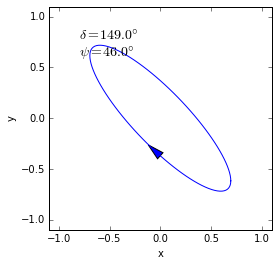

In [7]:
plotlimits = 1.1
npts_in_ellipse = 101
indexforarrowhead = 25
offsetindex = 2
arrowheadwidth = 0.08
arrowheadlength = 0.16

def plot_normalized_polarization(delta_deg,psi_deg):
    t_normalized = np.linspace(0,1,npts_in_ellipse)
    efield2 = normalized_electricfield_in_xyplane(t_normalized,np.radians(delta_deg),np.radians(psi_deg))
    dx, dy = approx_tangent_to_curve(indexforarrowhead,efield2[0],efield2[1])
    fig = plt.figure()
    ax = plt.axes(xlim=(-plotlimits, plotlimits), ylim=(-plotlimits,plotlimits))
    ax.plot(efield2[0],efield2[1])
    ax.set_aspect('equal')
    ax.arrow(efield2[0][indexforarrowhead],efield2[1][indexforarrowhead], 
             dx, dy, head_width=arrowheadwidth, head_length=arrowheadlength)
    if delta_deg % 180 == 0:
        ax.arrow(efield2[0][indexforarrowhead-offsetindex],efield2[1][indexforarrowhead-offsetindex], 
                 -dx, -dy, head_width=arrowheadwidth, head_length=arrowheadlength)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    labelstring = '$\delta = %.1f\degree$\n' % delta_deg
    labelstring += '$\psi = %.1f\degree$' % psi_deg
    ax.text(-0.8, 0.6, labelstring, fontsize = '14')

interact(plot_normalized_polarization,delta_deg=(-180,180),psi_deg=(0,90));

# 2D Polarization Animation


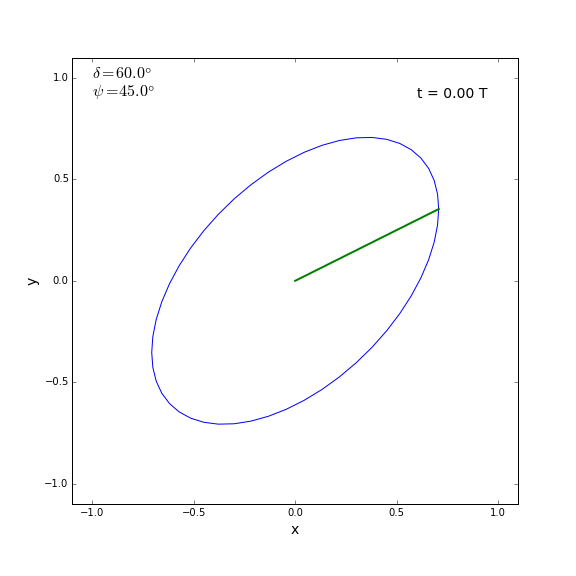
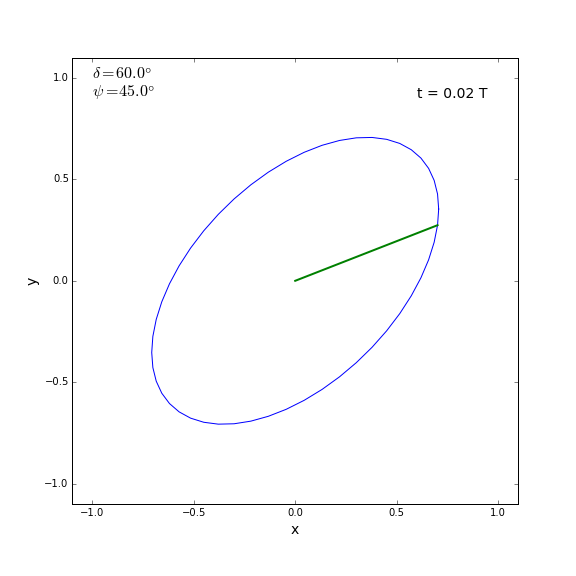
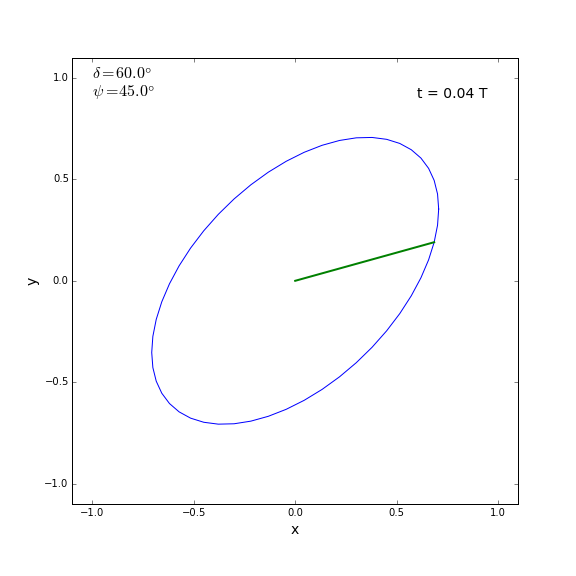
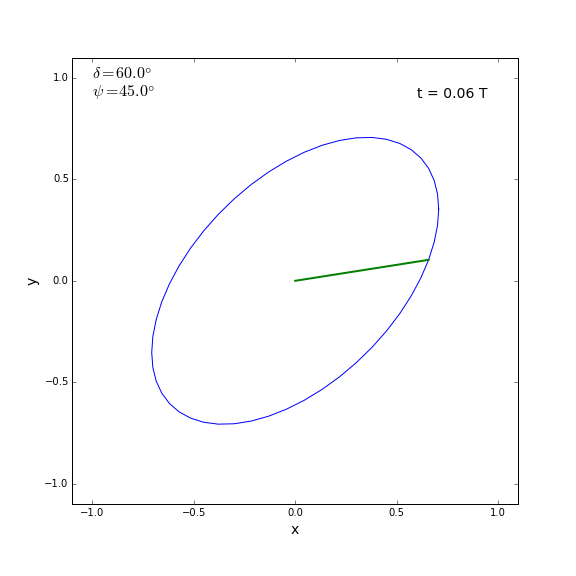
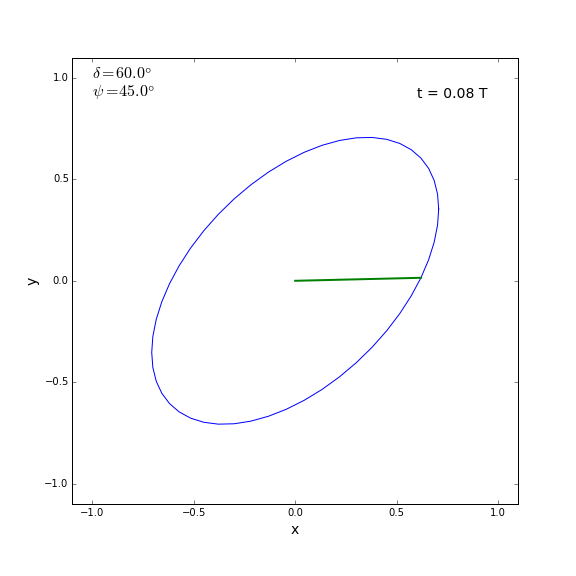
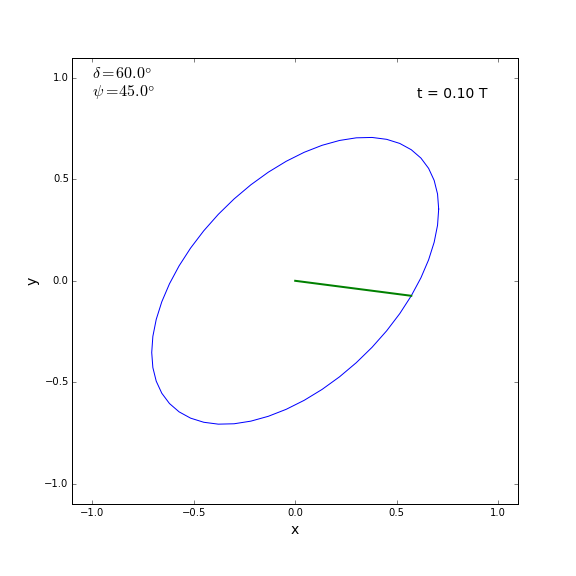
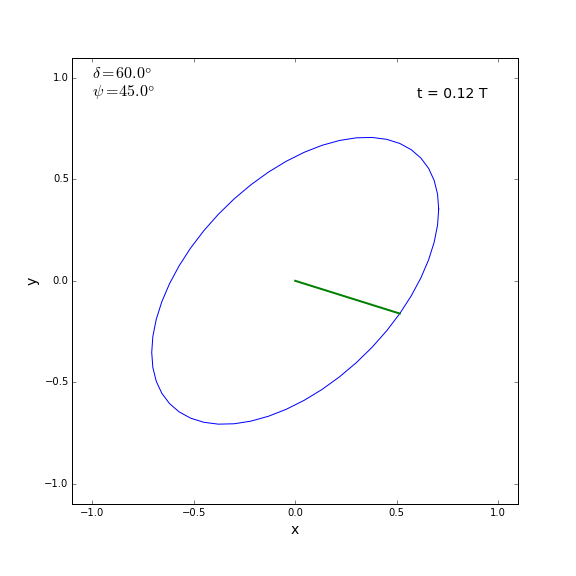
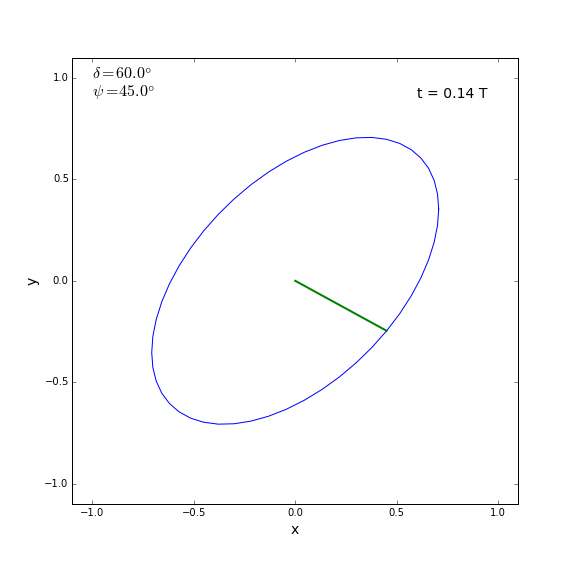
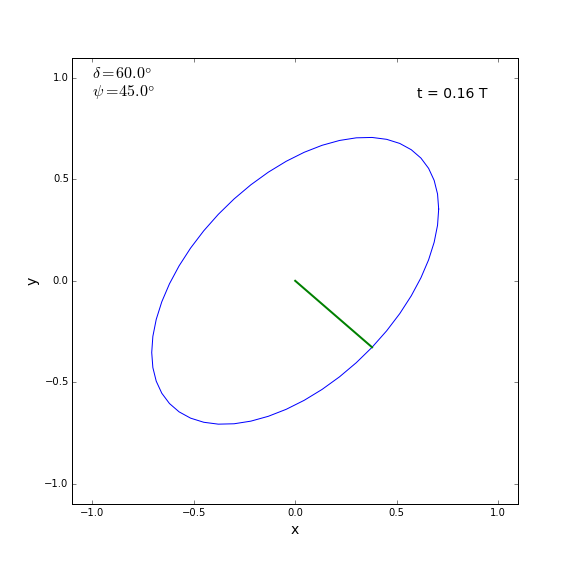
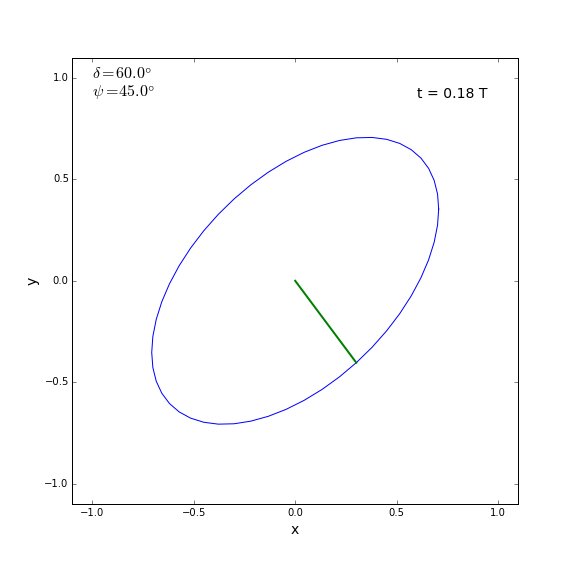
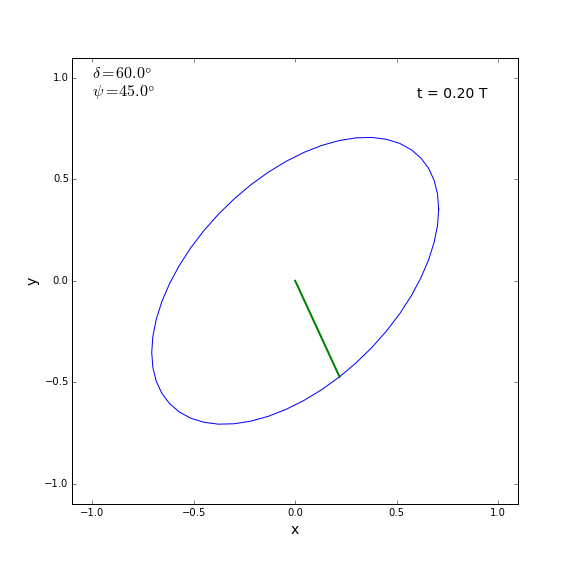
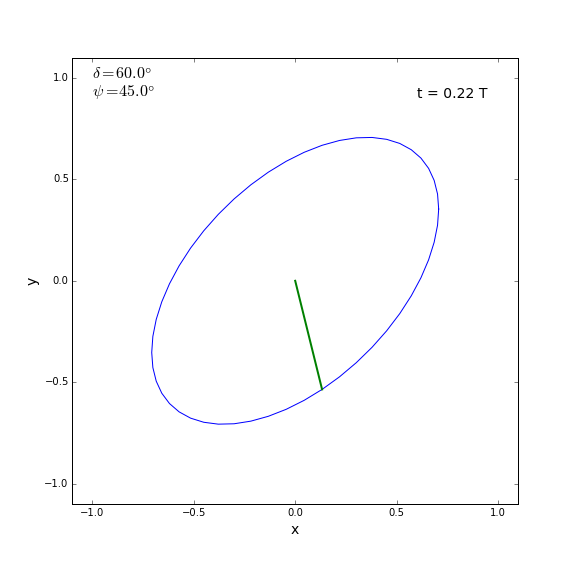
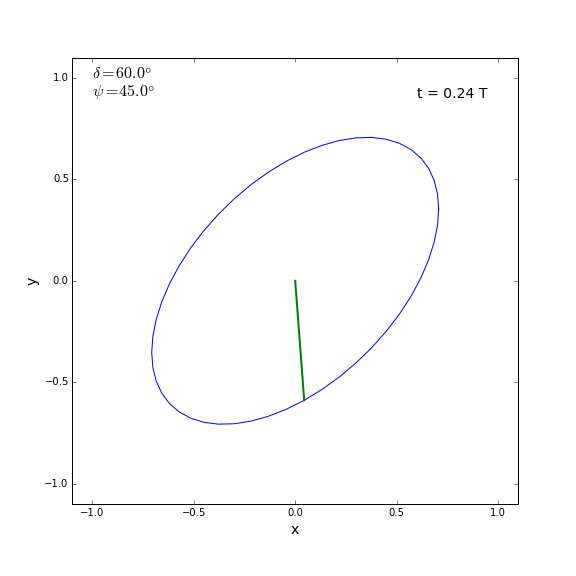
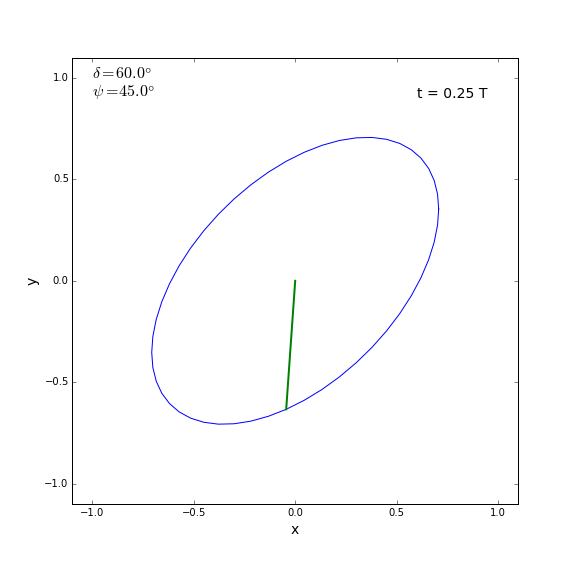
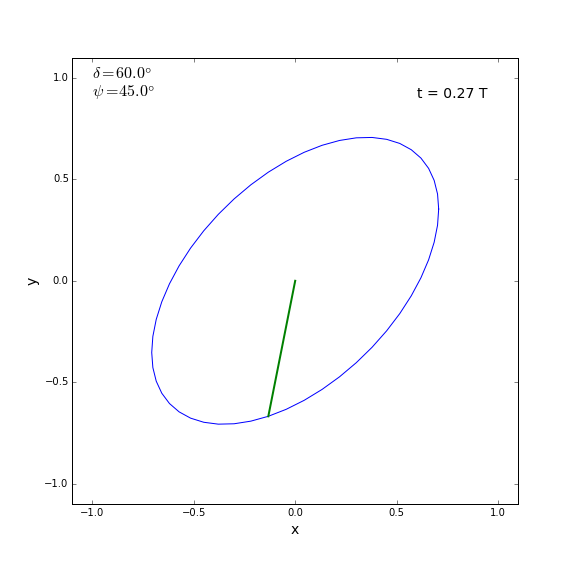
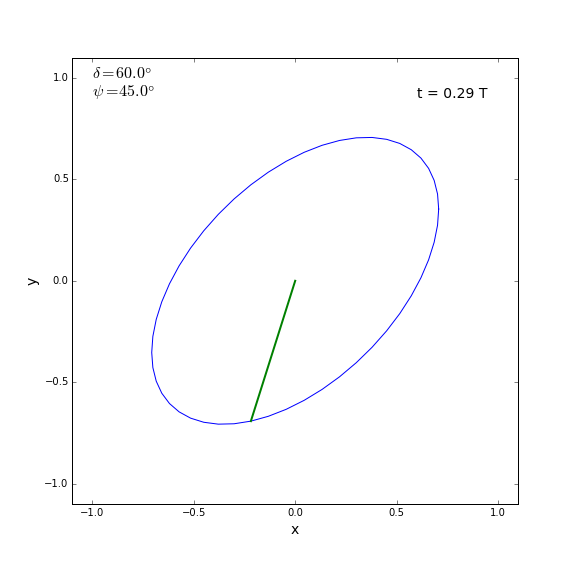
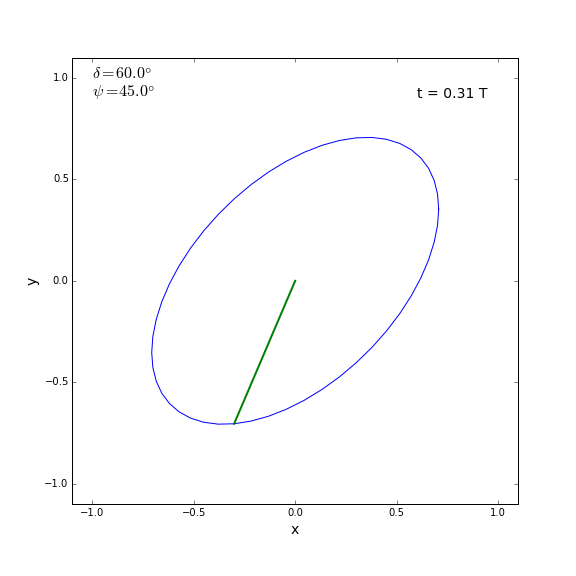
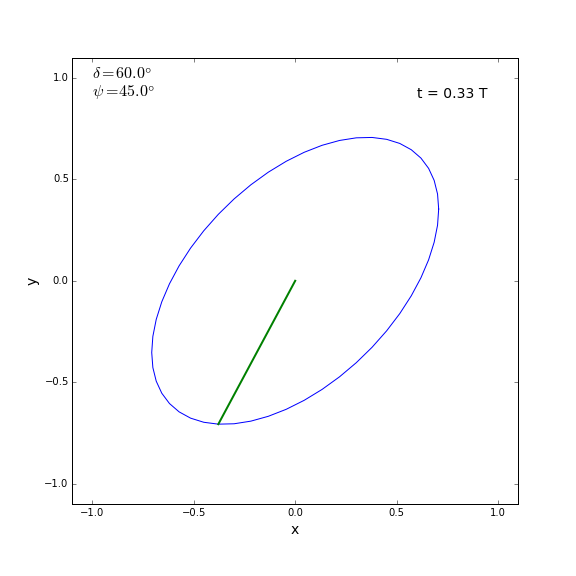
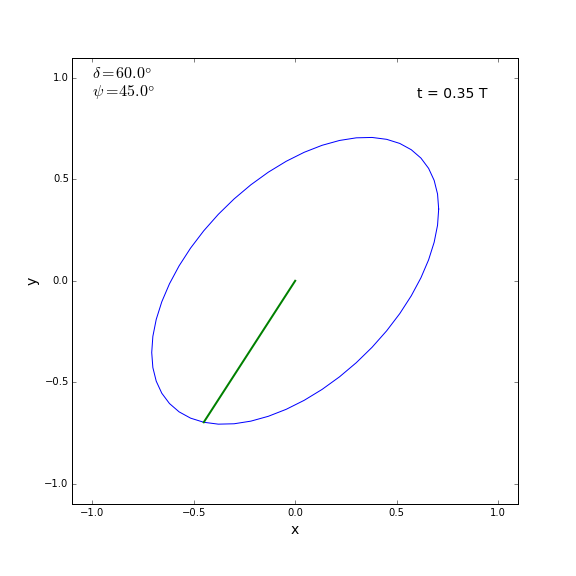
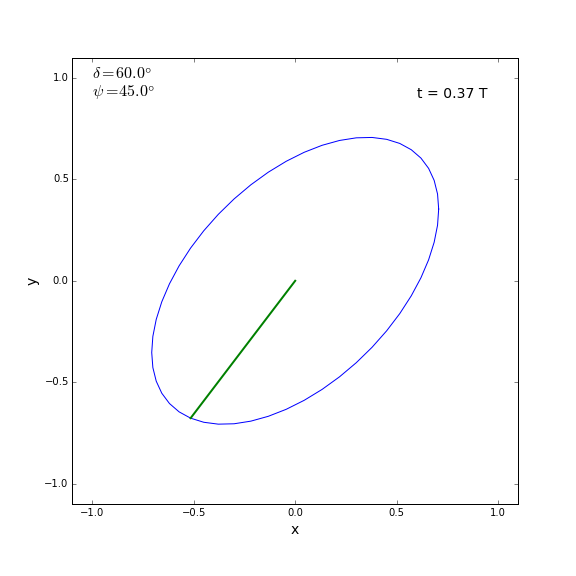
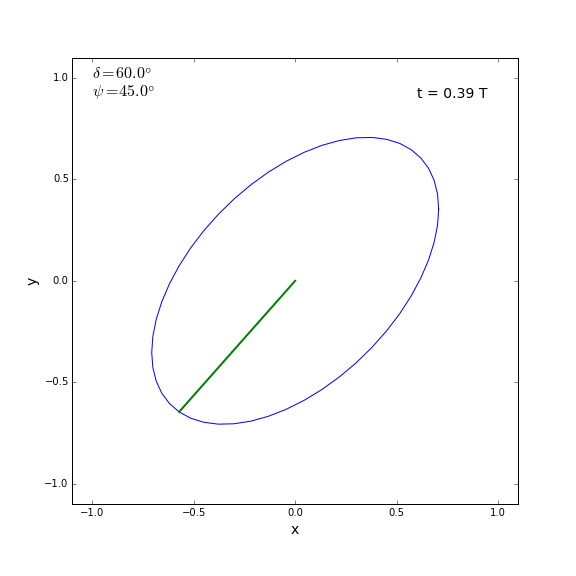
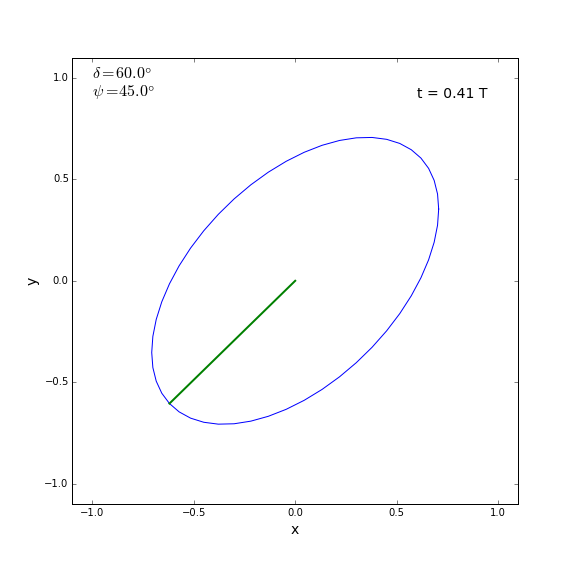
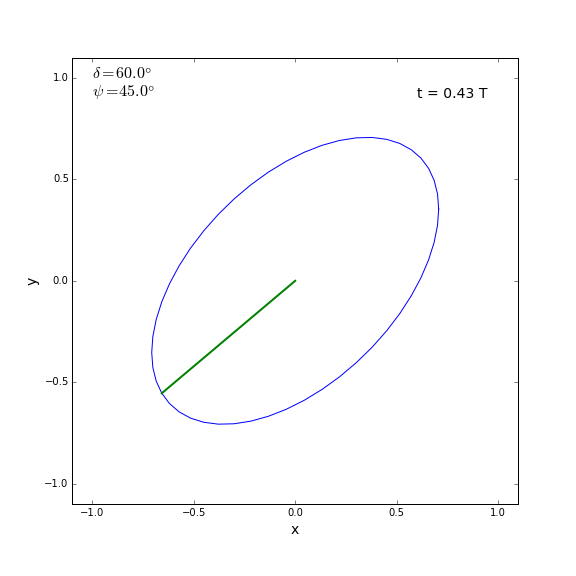
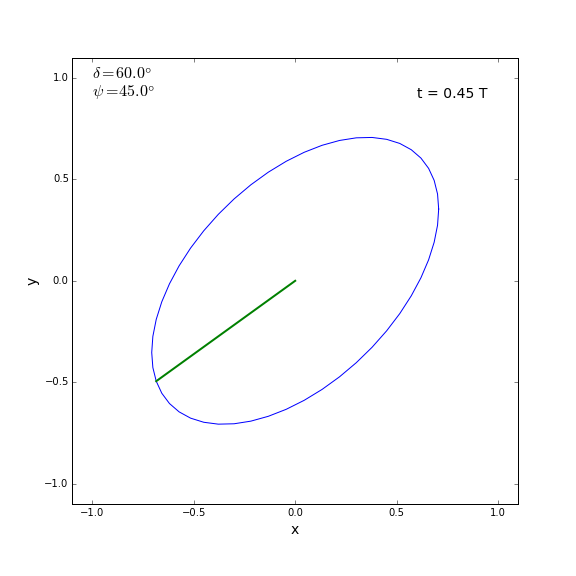
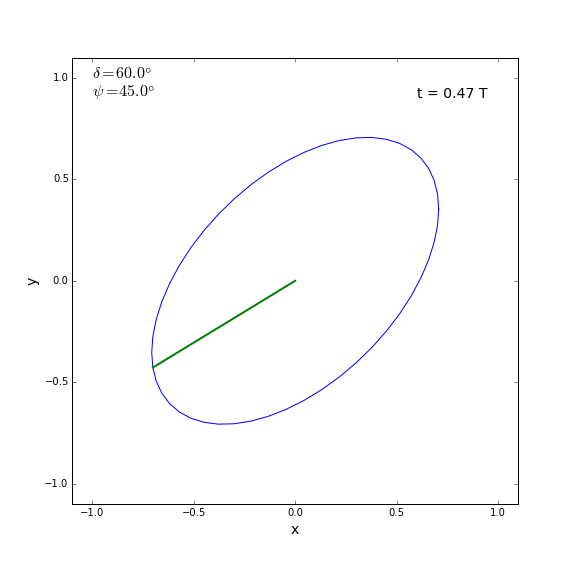
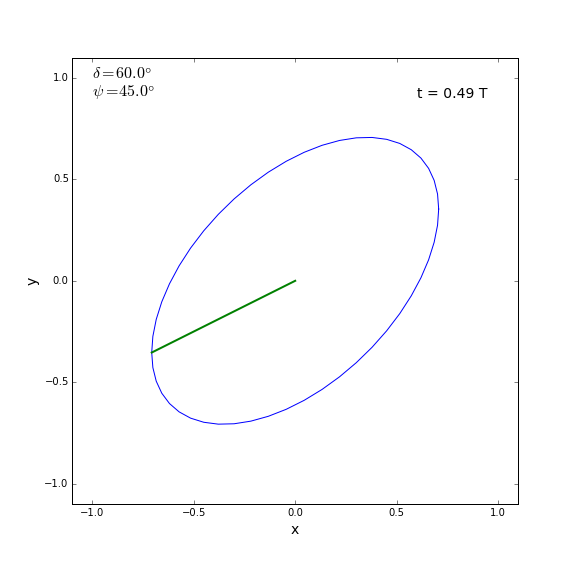
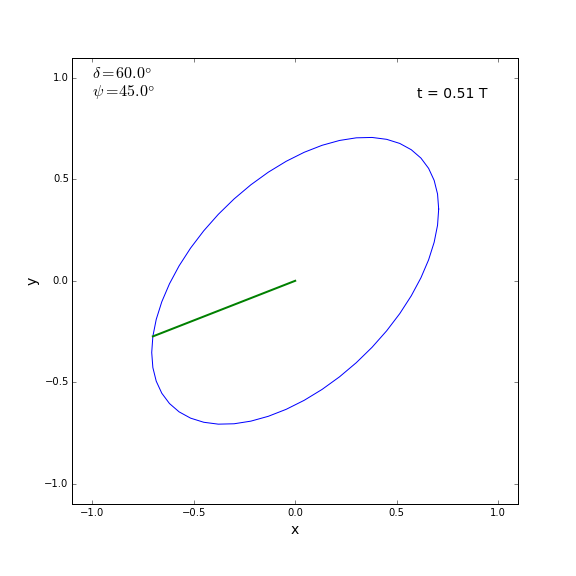
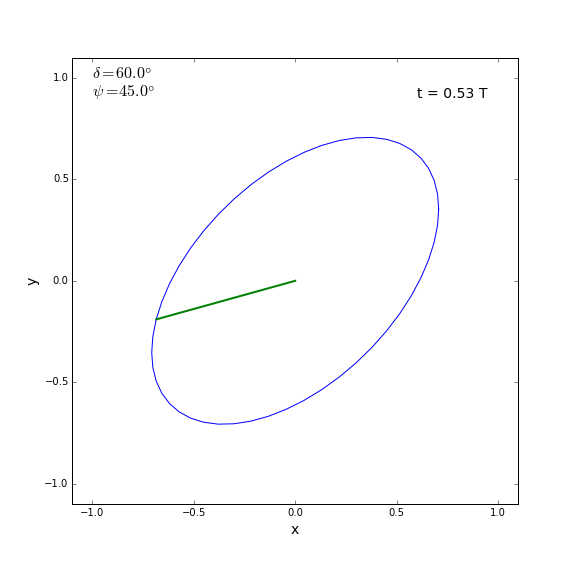
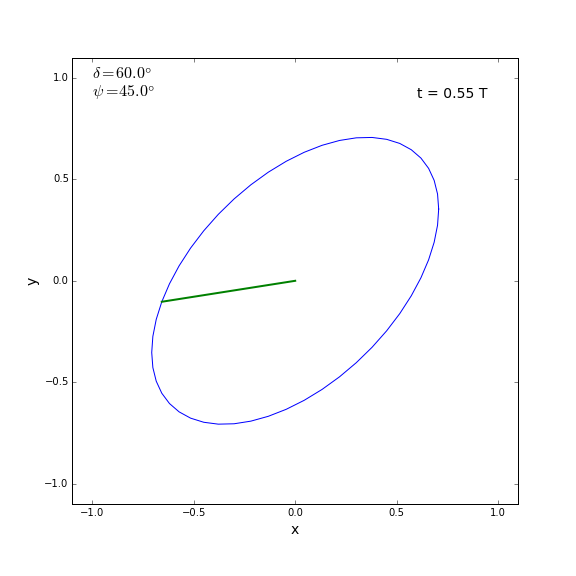
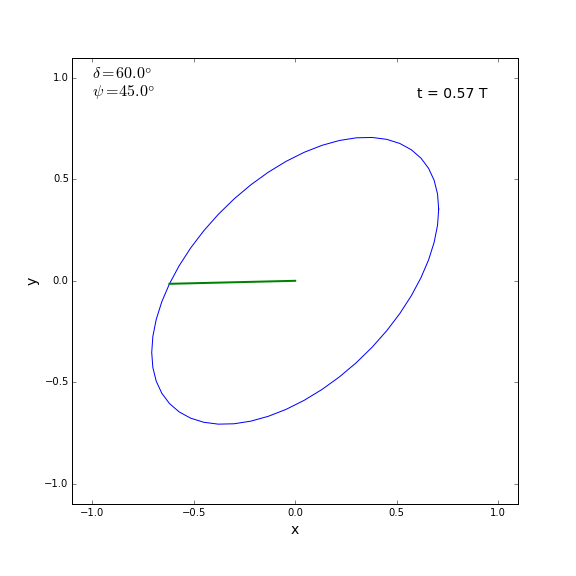
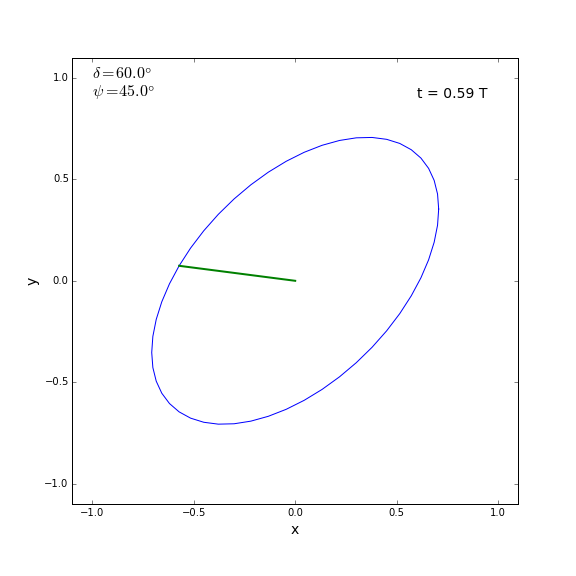
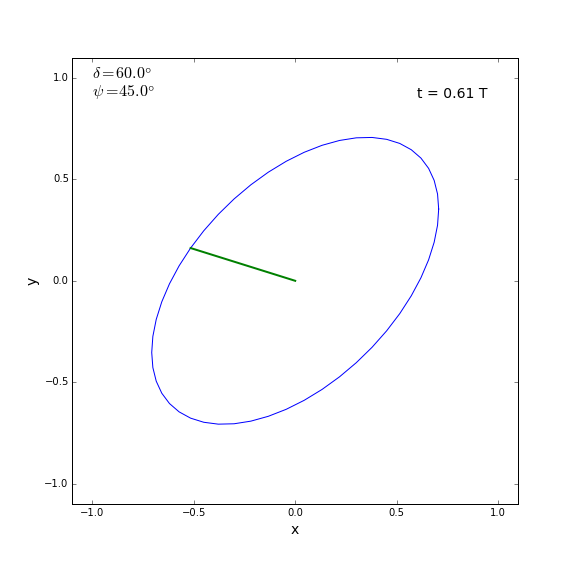
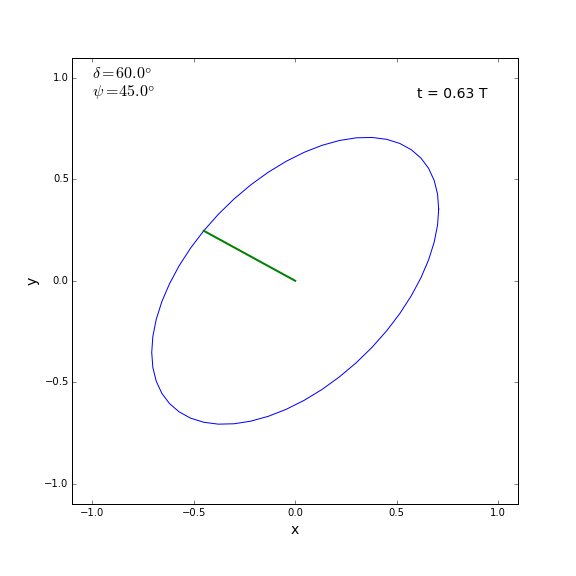
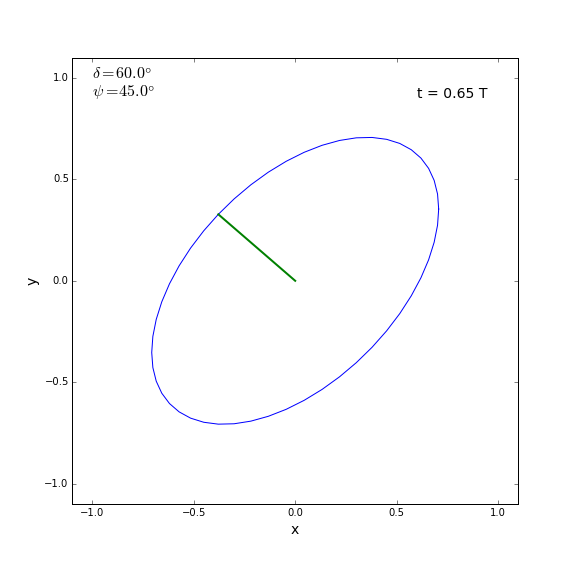
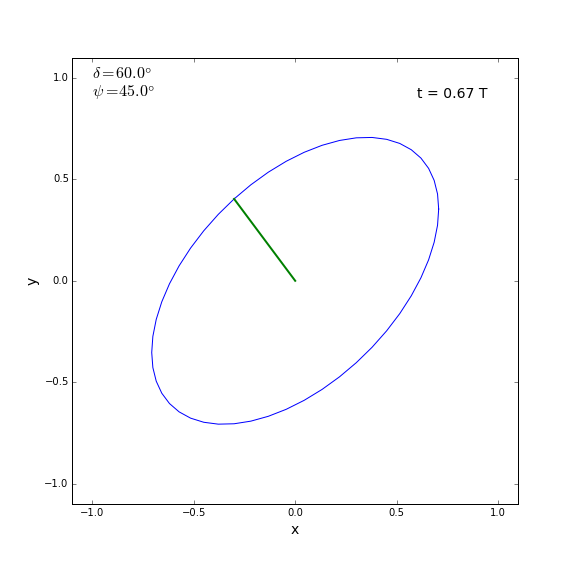
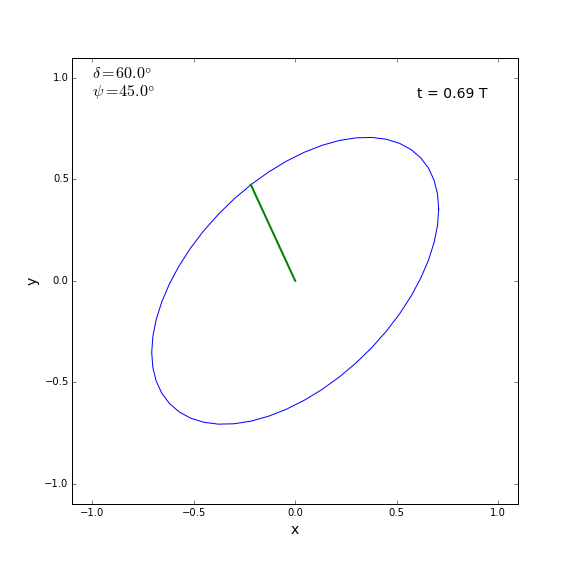
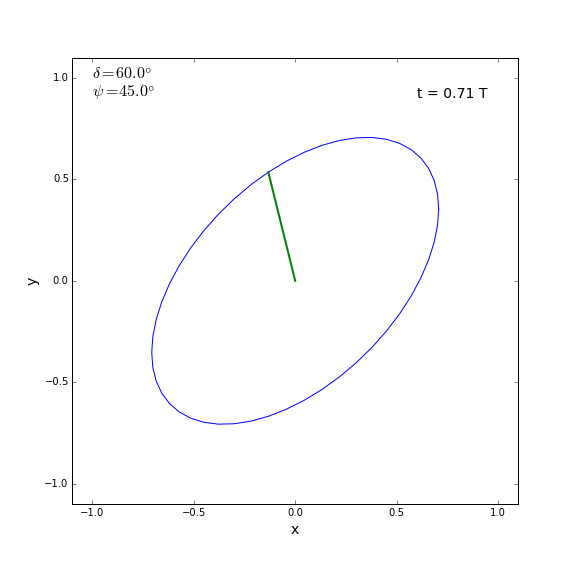
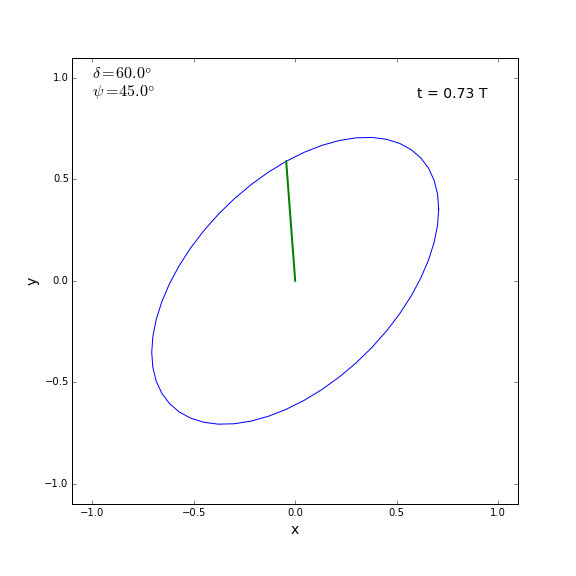
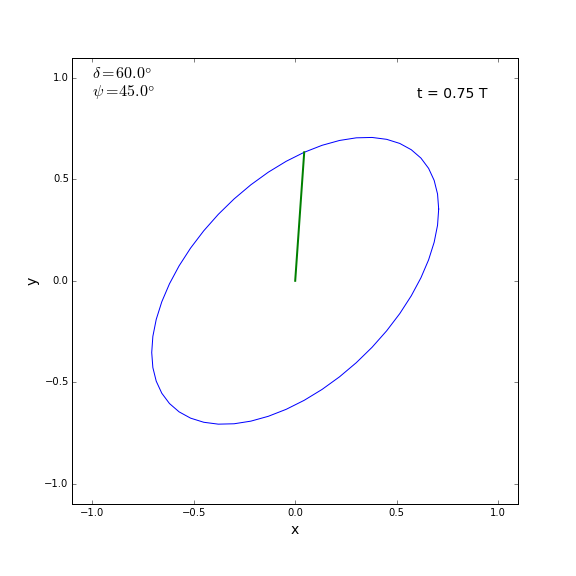
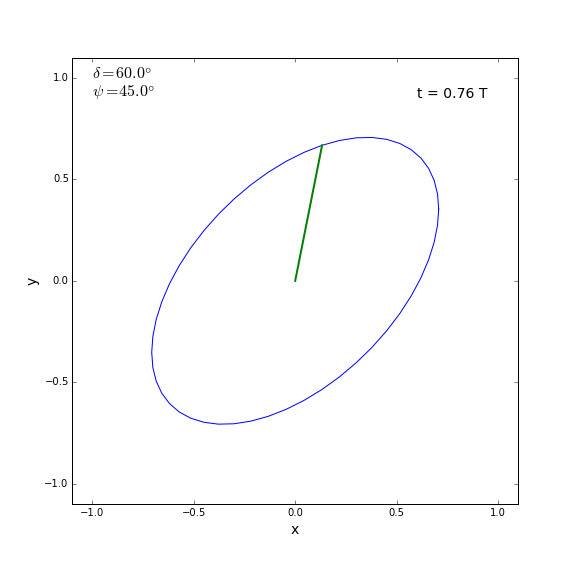
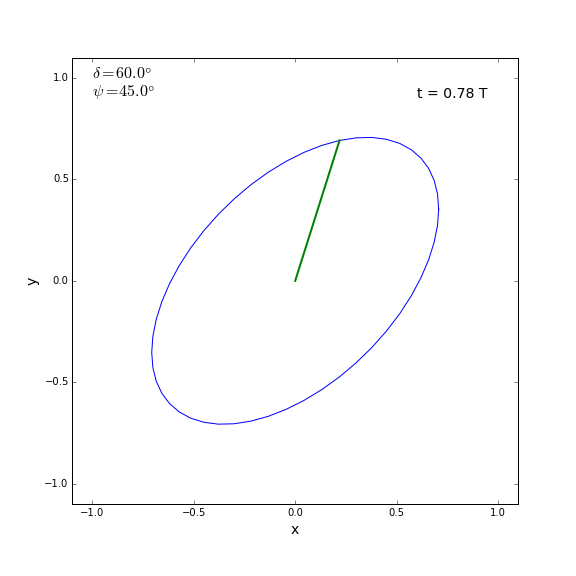
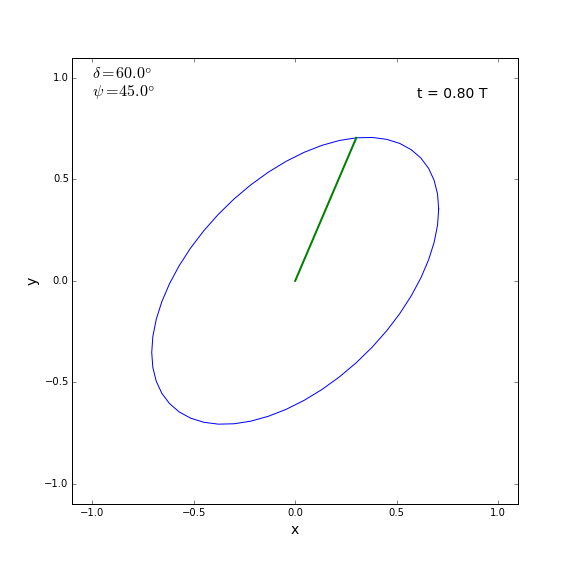
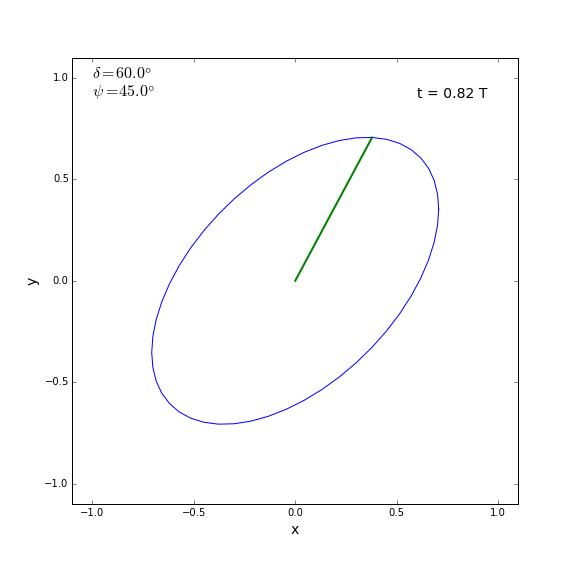
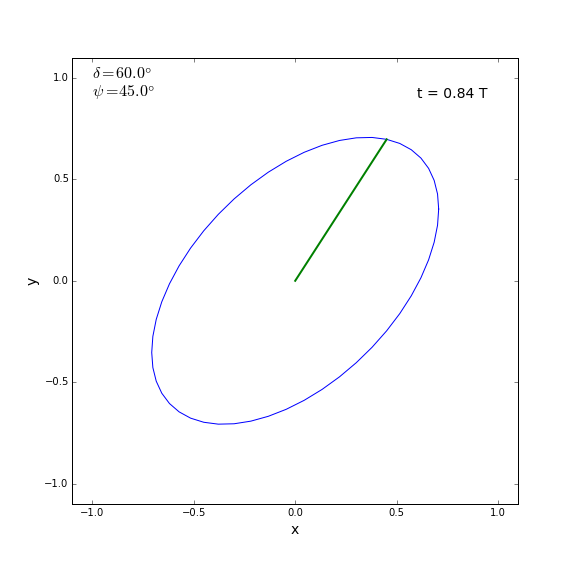
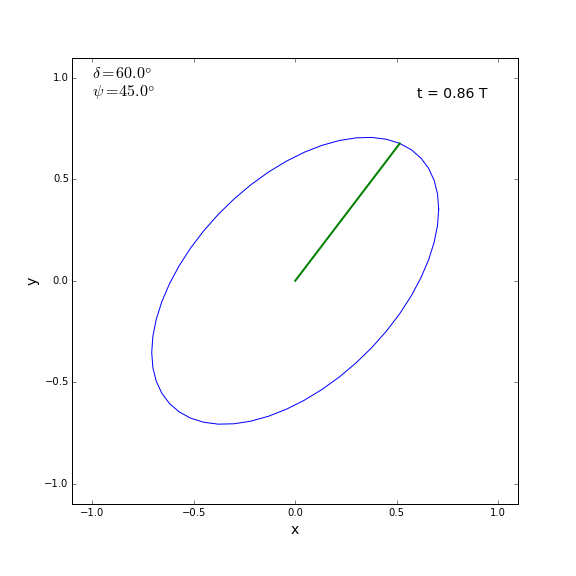
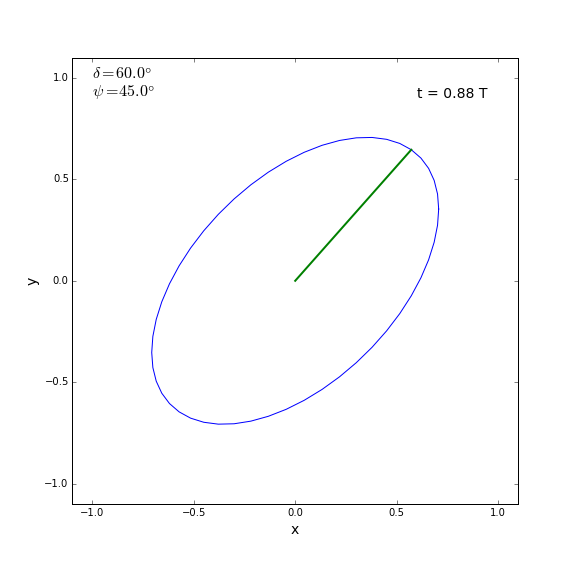
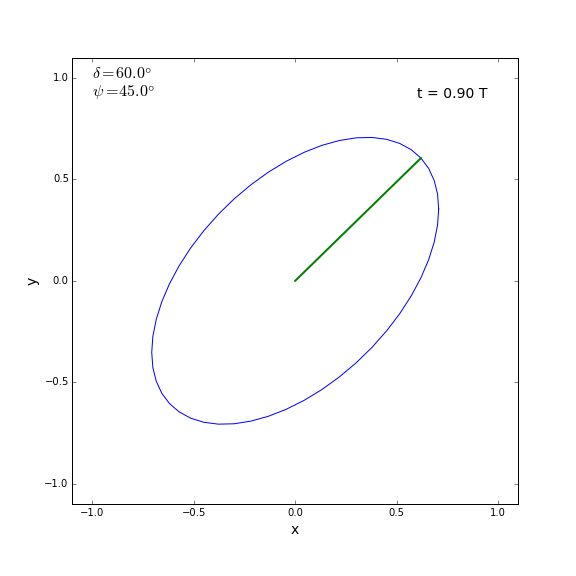
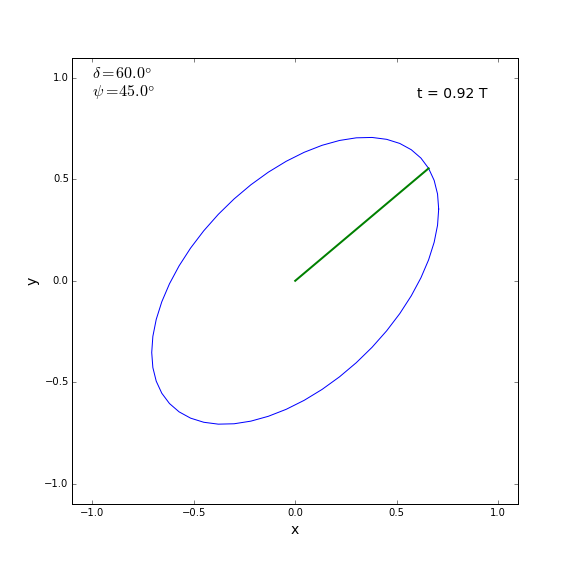
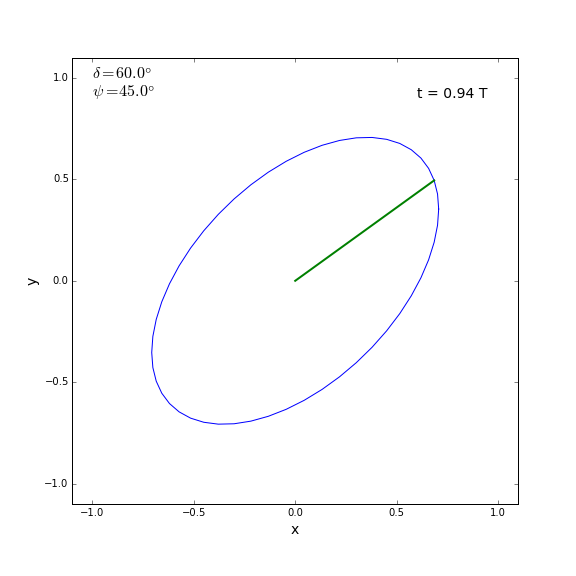
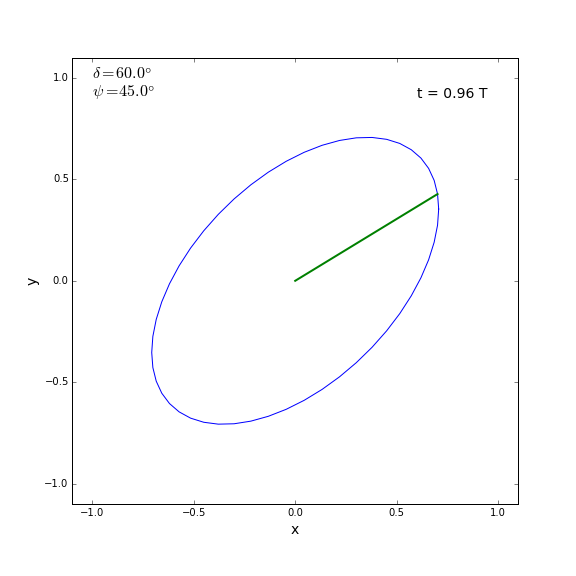
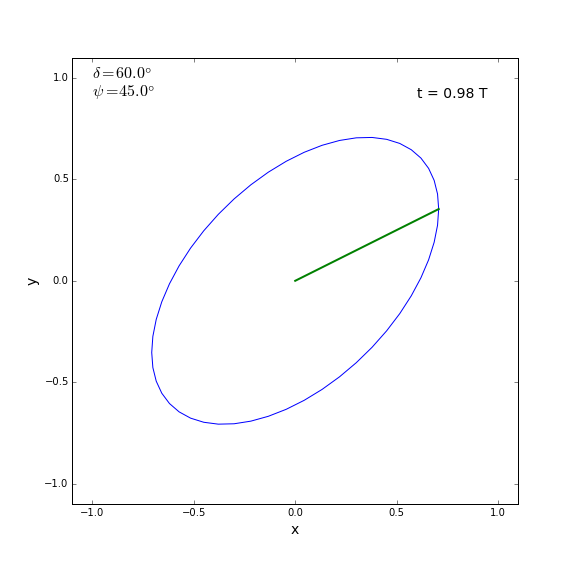

In [53]:
delta_deg = 60
psi_deg = 45
temp_index = 0

plotlimits = 1.1
npts_in_ellipse = 51
arrowheadwidth = 0.08
arrowheadlength = 0.16

def arrowlengthandangle(x,y,arrowheadlength):
    fulllength = np.sqrt(x**2 + y**2)
    arrowlength_net = fulllength - arrowheadlength
    theta = np.arctan2(y, x)
    return arrowlength_net, theta
    
def make_2Dpolarization_animation():
    
    # Set up more animation & plot parameters
    numframes = npts_in_ellipse
    plotfontsize = 14
    
    t_normalized = np.linspace(0,1,numframes)
    xx, yy = normalized_electricfield_in_xyplane(t_normalized,np.radians(delta_deg),np.radians(psi_deg))

    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(xlim=(-plotlimits, plotlimits), ylim=(-plotlimits,plotlimits))
    ax.plot(xx,yy)
    ax.set_aspect('equal')
    ax.set_xlabel('x', fontsize=plotfontsize)
    ax.set_ylabel('y', fontsize=plotfontsize)
    labelstring = '$\delta = %.1f\degree$\n' % delta_deg
    labelstring += '$\psi = %.1f\degree$' % psi_deg
    ax.text(-1.0, 0.9, labelstring, fontsize=plotfontsize+2)
    arrowlength_net, theta = arrowlengthandangle(xx[temp_index],yy[temp_index],arrowheadlength)
    '''a1 = plt.arrow(0.0, 0.0, arrowlength_net*np.cos(theta), arrowlength_net*np.sin(theta), 
             head_width=arrowheadwidth, head_length=arrowheadlength, fc="k", ec="k")'''
    line, = ax.plot([], [], lw=2)
    textfortime = ax.text(0.6, 0.9, '', fontsize=plotfontsize)
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        #ax.add_patch(a1)
        textfortime.set_text('')
        return line, textfortime,

    # animation function.  This is called sequentially
    def plot_efieldvector(i):
        t_normalized = float(i)/numframes
        '''tempv = calc_voltage_on_tline(t_normalized, v, loadreflcoeff, genreflcoeff, delta_voltages)'''
        line.set_data([0,xx[i]], [0,yy[i]])
        #a1.set_data(0,0,1,1)
        text4 = 't = %.2f T' % t_normalized
        textfortime.set_text(text4)
        return line, textfortime,
    # Create animation and return it
    return animation.FuncAnimation(fig, plot_efieldvector, init_func=init, frames=numframes, interval=20, blit=True)

make_2Dpolarization_animation()

# 2D Array of Polarization Plots

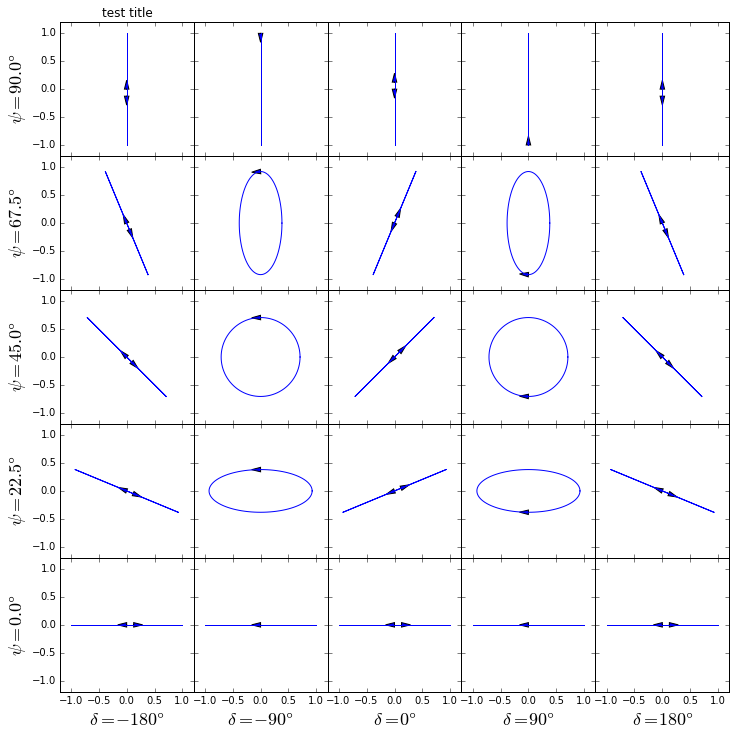

In [24]:
numrows = 5
numcols = 5
delta_deg = np.linspace(-180,180,numcols)
psi_deg = np.linspace(90,0,numrows)
npts_in_ellipse = 101
indexforarrowhead = 25
offsetindex = 2
arrowheadwidth = 0.08
arrowheadlength = 0.16
xlimit = 1.2
ylimit = 1.2
t_normalized = np.linspace(0,1,npts_in_ellipse)

# row and column sharing
f, ax = plt.subplots(numrows, numcols, sharex='col', sharey='row',figsize=(12,12))
for i in range(numrows):
    for j in range(numcols):
        xx,yy = normalized_electricfield_in_xyplane(t_normalized,np.radians(delta_deg[j]),np.radians(psi_deg[i]))
        ax[i][j].plot(xx,yy)
        dx, dy = approx_tangent_to_curve(indexforarrowhead,xx,yy)
        ax[i][j].arrow(xx[indexforarrowhead],yy[indexforarrowhead], 
                 dx, dy, head_width=arrowheadwidth, head_length=arrowheadlength)
        if delta_deg[j] % 180 == 0:
            ax[i][j].arrow(xx[indexforarrowhead-offsetindex],yy[indexforarrowhead-offsetindex], 
                     -dx, -dy, head_width=arrowheadwidth, head_length=arrowheadlength)
ax[0][0].set_title('test title')
# Set y limits
for i in range(numrows):
    ax[i][0].set_ylim(-ylimit,ylimit)
    ax[i][0].set_ylabel('$\psi = %.1f\degree$' % psi_deg[i], fontsize='18')
# Set x limits
for j in range(numcols):
    ax[numrows-1][j].set_xlim(-xlimit,xlimit)
    ax[numrows-1][j].set_xlabel('$\delta = %d\degree$' % delta_deg[j], fontsize='18')
# Fine-tune figure; make subplots close to each other.
f.subplots_adjust(hspace=0,wspace=0)

# Final Version - 2D Array of Polarization Subplots - 2/21/15

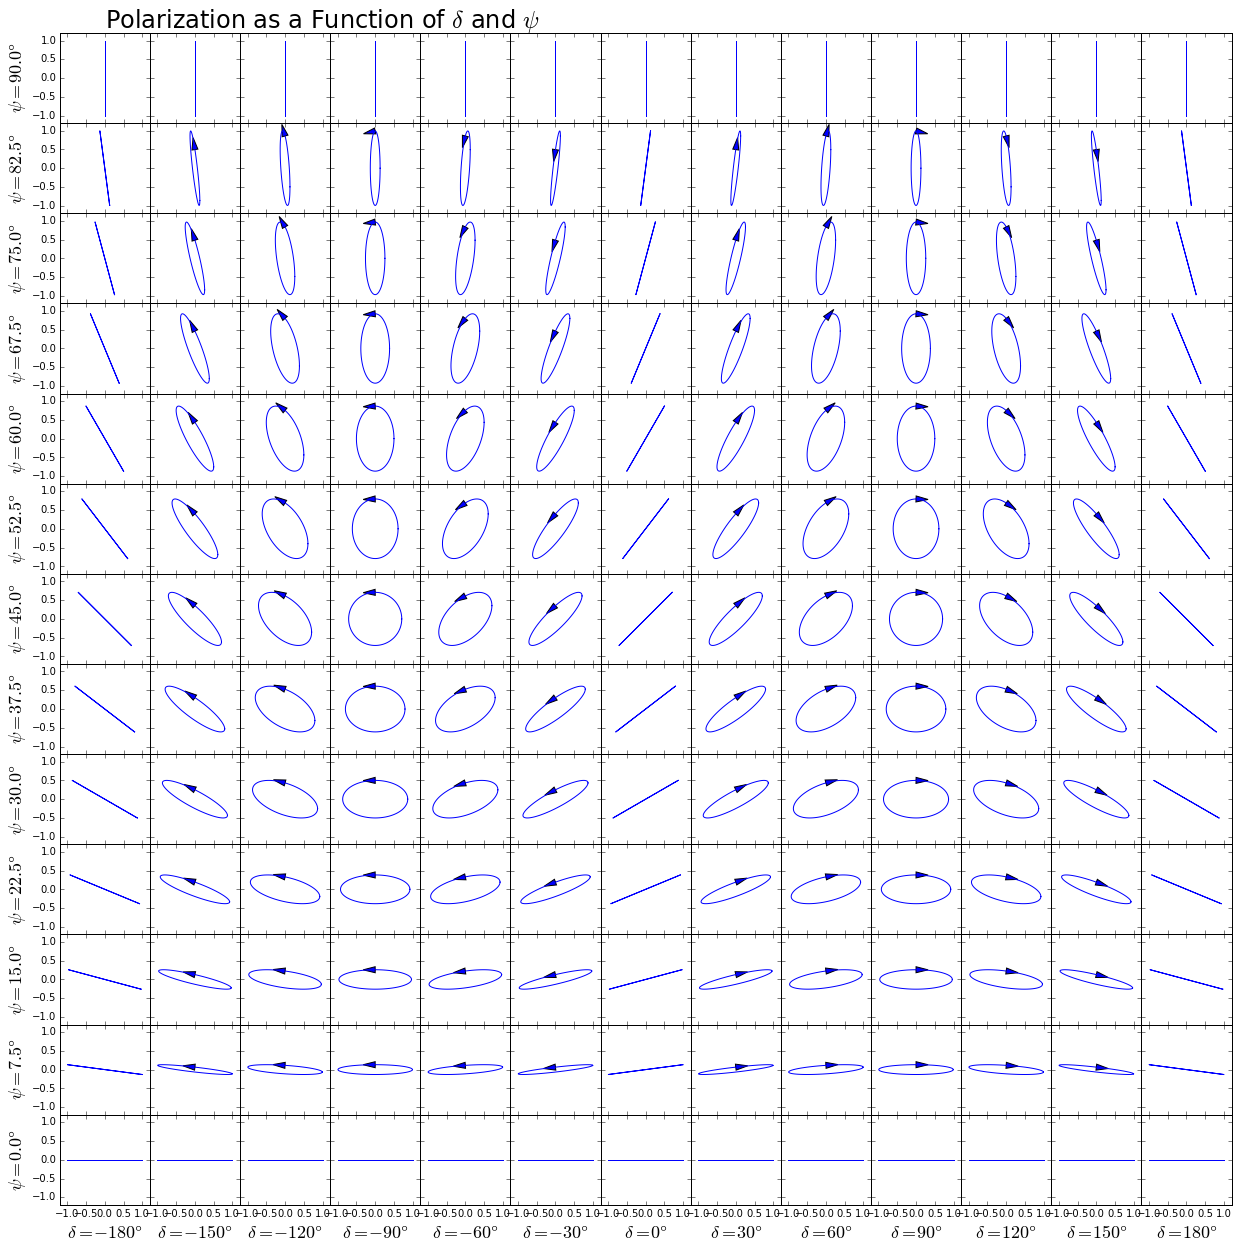

In [41]:
numrows = 13
numcols = 13
delta_deg = np.linspace(-180,180,numcols)
psi_deg = np.linspace(90,0,numrows)
npts_in_ellipse = 101
indexforarrowhead = 75
offsetindex = 2
arrowheadwidth = 0.16
arrowheadlength = 0.32
xlimit = 1.2
ylimit = 1.2
t_normalized = np.linspace(0,1,npts_in_ellipse)

# row and column sharing
f, ax = plt.subplots(numrows, numcols, sharex='col', sharey='row',figsize=(21,21))
for i in range(numrows):
    for j in range(numcols):
        xx,yy = normalized_electricfield_in_xyplane(t_normalized,np.radians(delta_deg[j]),np.radians(psi_deg[i]))
        ax[i][j].plot(xx,yy)
        if (delta_deg[j] >= 0) or (delta_deg[j] == -180):
            index = indexforarrowhead
        else:
            index = (npts_in_ellipse-1) - indexforarrowhead
        dx, dy = approx_tangent_to_curve(index,xx,yy)
        if (delta_deg[j] in (-180,0,180)) or (psi_deg[i] in (0,90)):
            pass
        else:
            ax[i][j].arrow(xx[index],yy[index], 
                     dx, dy, head_width=arrowheadwidth, head_length=arrowheadlength)
        '''if (delta_deg[j] % 180 == 0) or (psi_deg[i] == 0):
            ax[i][j].arrow(xx[indexforarrowhead-offsetindex],yy[indexforarrowhead-offsetindex], 
                     -dx, -dy, head_width=arrowheadwidth, head_length=arrowheadlength)'''
ax[0][0].set_title('Polarization as a Function of $\delta$ and $\psi$', fontsize='24',horizontalalignment='left')
# Set y limits
for i in range(numrows):
    ax[i][0].set_ylim(-ylimit,ylimit)
    ax[i][0].set_ylabel('$\psi = %.1f\degree$' % psi_deg[i], fontsize='18')
# Set x limits
for j in range(numcols):
    ax[numrows-1][j].set_xlim(-xlimit,xlimit)
    ax[numrows-1][j].set_xlabel('$\delta = %d\degree$' % delta_deg[j], fontsize='18')
# Fine-tune figure; make subplots close to each other.
f.subplots_adjust(hspace=0,wspace=0)
f.savefig('Polarization-large array of subplots.png')